In [0]:
import warnings
warnings.simplefilter('ignore')

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA


from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
df_accidentes = pd.read_csv("X.csv")

In [4]:
df_accidentes.head(10)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE
0,-75.578357,6.213719,673380.0,1642888.0,20.0,2018.0,1507.0,4.0,9.0,15.0,1.0,1.0,1.0
1,-75.592022,6.279157,557526.0,1620950.0,21.0,2018.0,715.0,3.0,3.0,7.0,1.0,1.0,2.0
2,-75.595882,6.275555,674912.0,1640270.0,30.0,2018.0,717.0,4.0,8.0,7.0,2.0,2.0,1.0
3,-75.567284,6.248271,674286.0,1641770.0,10.0,2018.0,1019.0,1.0,9.0,10.0,2.0,2.0,1.0
4,-75.576195,6.213677,681701.0,1645768.0,12.0,2018.0,1419.0,5.0,10.0,14.0,2.0,1.0,1.0
5,-75.603532,6.257358,685968.0,1653788.0,16.0,2018.0,1205.0,7.0,12.0,12.0,1.0,2.0,1.0
6,-75.578357,6.213719,679913.0,1647340.0,26.0,2018.0,1507.0,5.0,10.0,15.0,1.0,1.0,2.0
7,-75.545204,6.277668,674799.0,1641184.0,5.0,2018.0,302.0,3.0,9.0,3.0,2.0,1.0,1.0
8,-75.559241,6.248664,562288.0,1618534.0,2.0,2018.0,1016.0,5.0,3.0,10.0,2.0,2.0,1.0
9,-75.546005,6.233018,550047.0,1612113.0,6.0,2018.0,904.0,6.0,1.0,9.0,2.0,2.0,1.0


In [5]:
df_accidentes.shape

(35472, 13)

In [0]:
dt_features = df_accidentes.drop(['NUM_GRAVEDAD'], axis =1)
dt_target = df_accidentes['NUM_GRAVEDAD']

dt_features = StandardScaler().fit_transform(dt_features)
    
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.6, random_state=50)

In [7]:
print(f'Tamaño para X_train {X_train.shape}')
print(f'Tamaño para y_train {y_train.shape}')

Tamaño para X_train (14188, 12)
Tamaño para y_train (14188,)


In [8]:
#n_components = min(n_muestras, n_features)

pca = PCA(n_components=3)
pca.fit(X_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)


IncrementalPCA(batch_size=10, copy=True, n_components=3, whiten=False)

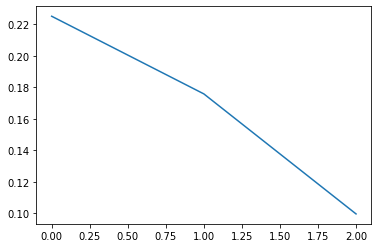

In [9]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

In [10]:
logistic = LogisticRegression(solver='lbfgs')
    
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train,y_train)
print(f'SCORE PCA {logistic.score(dt_test, y_test)}')

dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train,y_train)
print(f'SCORE IPCA {logistic.score(dt_test, y_test)}')

SCORE PCA 0.6455083630896448
SCORE IPCA 0.62248637474159


El rendimiento es exactamente el mismo

# Kernel

In [11]:
kpca = KernelPCA(n_components =3, kernel='poly')
kpca.fit(X_train)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=None, kernel='poly',
          kernel_params=None, max_iter=None, n_components=3, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [12]:
dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)

logistic = LogisticRegression(solver = 'lbfgs')
logistic.fit(dt_train, y_train)
print(f'SCORE KPCA {logistic.score(dt_test, y_test)}')

SCORE KPCA 0.5294587483555723


# Regularizacion

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [0]:
X = df_accidentes[['X',	'Y',	'OBJECTID',	'RADICADO',	'DIA',	'PERIODO',	'CBML',	'DIA_SEMANA',	'MES',	'NUM_COMUNA',	'NUM_DISENO',	'NUM_CLASE']]
y = df_accidentes[['NUM_GRAVEDAD']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)


# Modelo linaeal

In [0]:
modelLinear = LinearRegression().fit(X_train, y_train)
y_predict_linear = modelLinear.predict(X_test)

# modelo Lasso

In [0]:
modelLasso = Lasso(alpha=0.02).fit(X_train, y_train)
y_predict_lasso = modelLasso.predict(X_test)

# Modelo Ridge

In [0]:
modelRidge = Ridge(alpha=1).fit(X_train, y_train)
y_predict_ridge = modelRidge.predict(X_test)

# definiendo perdida

In [0]:
linear_loss = mean_squared_error(y_test, y_predict_linear)
lasso_loss = mean_squared_error(y_test, y_predict_lasso)
ridge_loss = mean_squared_error(y_test, y_predict_ridge)



In [20]:
print(f'Linear Loss',linear_loss)
print(f'Lasso Loss',lasso_loss)
print(f'Ridge Loss',ridge_loss)

Linear Loss 0.18653027867623165
Lasso Loss 0.19024894778965087
Ridge Loss 0.1866216909853479


# Coeficientes

In [21]:
print("="*32)
print("Coeficiente LASSO")
print(modelLasso.coef_)

print("="*32)
print("Coeficiente RIDGE")
print(modelRidge.coef_)

Coeficiente LASSO
[ 0.00000000e+00 -0.00000000e+00 -9.74016450e-08  2.96513578e-07
 -7.21378626e-06 -0.00000000e+00 -2.04949251e-11 -0.00000000e+00
 -0.00000000e+00  7.90738750e-03 -0.00000000e+00 -1.49033966e-01]
Coeficiente RIDGE
[[ 6.88879490e-01 -1.14085955e+00  2.74693597e-07  9.73179315e-05
  -1.22227083e-02 -4.29514122e+00 -2.51816293e-11 -3.67705480e-03
  -3.64501490e-01  4.43233078e-03 -1.28226656e-02 -1.51357692e-01]]
